In [2]:
from qiskit import *
import numpy as np
import math
%matplotlib inline

pi = math.pi

q = QuantumRegister(5)
c = ClassicalRegister(3)
cir = QuantumCircuit(q, c)
cir.h(q[0])
cir.h(q[1])
cir.h(q[2])
cir.x(q[3])
cir.h(q[3])

# f' = a'b'c'+a'b'c+a'bc'+ab'c'+ab'c+abc'+abc
# f = (a+b+c)(a+b+c')(a+b'+c)(a'+b+c)(a'+b+c')(a'+b'+c)(a'+b'+c')

# 1st iteration
# oracle
cir.x(q[0])
cir.mct([q[0], q[1], q[2]], q[3], [q[4]])
cir.x(q[0])

# diffusion
cir.h(q[0])
cir.h(q[1])
cir.h(q[2])
cir.h(q[3])
cir.x(q[0])
cir.x(q[1])
cir.x(q[2])
cir.mcrz(pi, [q[0], q[1]], q[2])
cir.x(q[0])
cir.x(q[1])
cir.x(q[2])
cir.h(q[0])
cir.h(q[1])
cir.h(q[2])

cir.barrier([q[0], q[1], q[2]])
cir.measure([q[0], q[1], q[2]], [c[0], c[1], c[2]])
cir.draw()

{'000': 512, '010': 497, '001': 530, '111': 491, '100': 509, '011': 491, '110': 12897, '101': 457}


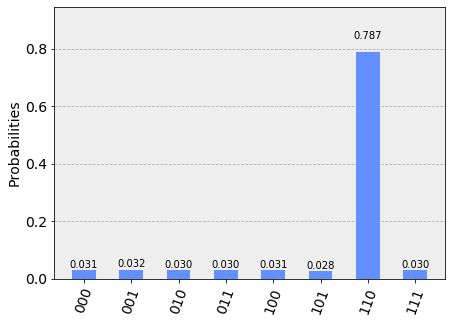

In [4]:
backend = Aer.get_backend('qasm_simulator')
job = execute(cir, backend, shots = 16384)
result = job.result()

counts = result.get_counts(cir)
print(counts)
visualization.plot_histogram(counts)